In [1]:
import pandas as pd
import io
import requests
from datetime import datetime
import pandas_market_calendars

from typing import List
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Last date for short data
end_date = datetime(year=2022, month=9, day=20) 

# Num days for trend
offset = 500

In [3]:
nyse = pandas_market_calendars.get_calendar('NYSE')

In [4]:
def finra_short_by_date(d: datetime) -> pd.DataFrame:
    base_url = f'https://cdn.finra.org/equity/regsho/daily/CNMSshvol{d.strftime("%Y%m%d")}.txt'
    content = requests.get(base_url).content
    df = pd.read_csv(io.StringIO(content.decode('utf-8')), sep="|", index_col=0, usecols=[1,2,3,4,5])
    df['date'] = d.date()
    df['ShortPercent'] = round(100. * df['ShortVolume'] / df['TotalVolume'], 2)
    return df

def get_trading_holidays() -> List[str]:
    return nyse.holidays().holidays

In [5]:
cbd_offset = pd.tseries.offsets.CustomBusinessDay(n=offset - 1, holidays=get_trading_holidays())
start_date = datetime.utcnow() - cbd_offset
schedule = nyse.schedule(start_date=start_date, end_date=end_date)

In [6]:
data = {'date': [], 'short_percentage': []}
for day in schedule.index.to_list():
    df = finra_short_by_date(day)
    data['date'].append(day)
    data['short_percentage'].append(df.loc['AAPL']['ShortPercent'])

In [7]:
appl_data = pd.DataFrame(data=data['short_percentage'], index=data['date'], columns=['Short Percentage'])

In [8]:
appl_data

,Short Percentage
2020-09-29,43.30
2020-09-30,40.72
2020-10-01,61.06
2020-10-02,60.28
2020-10-05,36.85
...,...
2022-09-14,46.41
2022-09-15,45.32
2022-09-16,40.92
2022-09-19,40.82


(array([18536., 18628., 18718., 18809., 18901., 18993., 19083., 19174.,
        19266.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

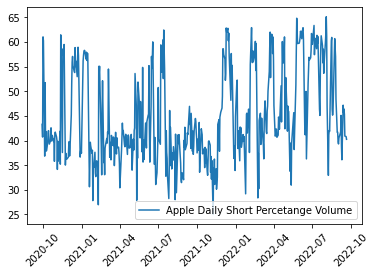

In [9]:
plt.plot(
    appl_data,
    label="Apple Daily Short Percetange Volume",
)
plt.legend()
plt.xticks(rotation=45) 

In [13]:
finra_short_by_date(end_date).dropna()

,ShortVolume,ShortExemptVolume,TotalVolume,Market,date,ShortPercent
Symbol,,,,,,
A,216459.0,487.0,426407.0,"B,Q,N",2022-09-20,50.76
AA,1337513.0,1705.0,2012123.0,"B,Q,N",2022-09-20,66.47
AAA,10.0,0.0,21.0,"Q,N",2022-09-20,47.62
AAAU,111153.0,0.0,396936.0,"B,Q,N",2022-09-20,28.00
AAC,7635.0,0.0,123380.0,Q,2022-09-20,6.19
...,...,...,...,...,...,...
ZWS,166458.0,29.0,348833.0,"B,Q,N",2022-09-20,47.72
ZY,57926.0,0.0,154750.0,"B,Q,N",2022-09-20,37.43
ZYME,42970.0,125.0,131545.0,"B,Q,N",2022-09-20,32.67
